In [1]:
import pandas as pd
import numpy as np
from scipy.stats.stats import pearsonr
import math

## Stats on Output and Citation

## http://www.ref.ac.uk/2014/about/guidance/citationdata/
## citations were provided by Elsevier who own Scopus and thus the data is from Scopus

# Load and clean the output file
output_or = pd.read_csv("REF2014Data_output.csv")


# Clear the dataframe to include only values required
output = output_or.drop(output_or.columns[[range(1,27)]], axis=1)
output = output.drop(output.columns[[2,3,4]], axis=1)

In [2]:
# Find the means for eah UKPRN for total citations and replace nans
length = {}
total = {}
mean = {}
output_temp = output.dropna()
for index, row in output_temp.iterrows():
    if row["UKPRN"] not in length:
        length[row["UKPRN"]] = 1
        total[row["UKPRN"]] = row["CitedByCount"]
    else:
        length[row["UKPRN"]] +=1
        total[row["UKPRN"]] += row["CitedByCount"]
    
for item in total:
    if item in length:
        mean[item] = total[item] / length[item]
        
# Get the true length of each uni (wihtout dropna)
truelength = {}
for index, row in output.iterrows():
    if row["UKPRN"] not in truelength:
        truelength[row["UKPRN"]] = 1
    else:
        truelength[row["UKPRN"]] += 1
        
# Multiply mean by each true length occurence to find true total citations
tot_cit = {}

for item in truelength:
    if item in mean:
        tot_cit[item] = mean[item] * truelength[item]

In [3]:
# Obtain the number of universities
unis = output["UKPRN"].unique


In [4]:
# Load the submission profile file and clean it
sub_prof_or = pd.read_csv("REF2014Data_submissionprofile.csv")

# Keep only rows of overall score
subprof = sub_prof_or[sub_prof_or["Profile"].str.contains("Overall")]

# Drop irrelevant columns
subprof = subprof.drop(subprof.columns[[1,2,3,5,6,7,8]], axis=1)

# Gather the four star for each uni
unifour = {}

for index, row in subprof.iterrows():
    unifour[row["UKPRN"]] = row["FourStar"]

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

# four star ranking per uni (y axis)
unifour_y= list(unifour.values())

# total citations per uni (x axis)
totcit_x = list(tot_cit.values())

        

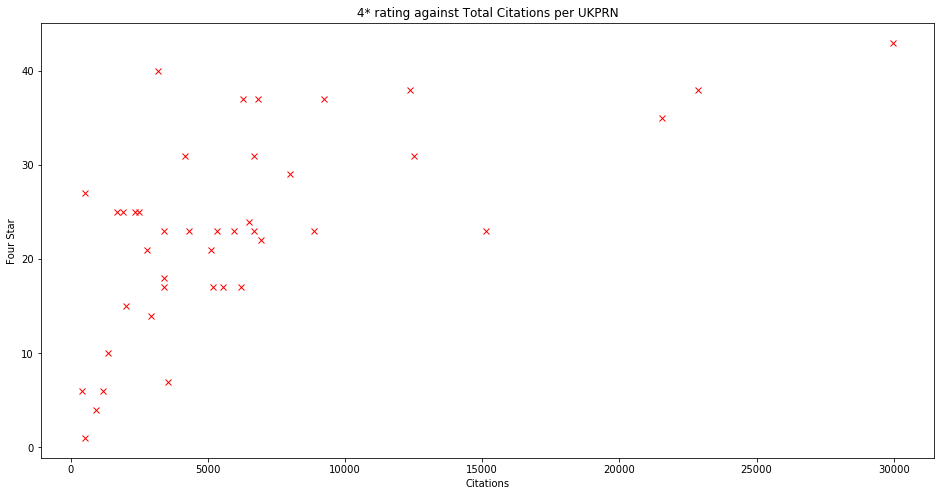

In [6]:
fig, ax = plt.subplots(figsize=(16, 8))
#ax.set_yscale('log')
plt.plot(totcit_x, unifour_y, "rx")
plt.title("4* rating against Total Citations per UKPRN")
ax.set(xlabel = "Citations", ylabel = "Four Star")

#plt.savefig("Cit 4*")


In [7]:
## Correlation of four star against total citations:
pearsonr(totcit_x, unifour_y)

(0.62039317297923524, 1.5134836731160844e-05)

In [8]:
## Check against one star
## The theory is that less citations will increase one star

# Keep only rows of overall score
subproft = sub_prof_or[sub_prof_or["Profile"].str.contains("Overall")]

# Drop irrelevant columns
subproft = subproft.drop(subproft.columns[[1,2,3,4,5,8]], axis=1)


# Gather the one & two star for each uni
unilow = {}

for index, row in subproft.iterrows():
    unilow[row["UKPRN"]] = row["OneStar"] + row["TwoStar"]

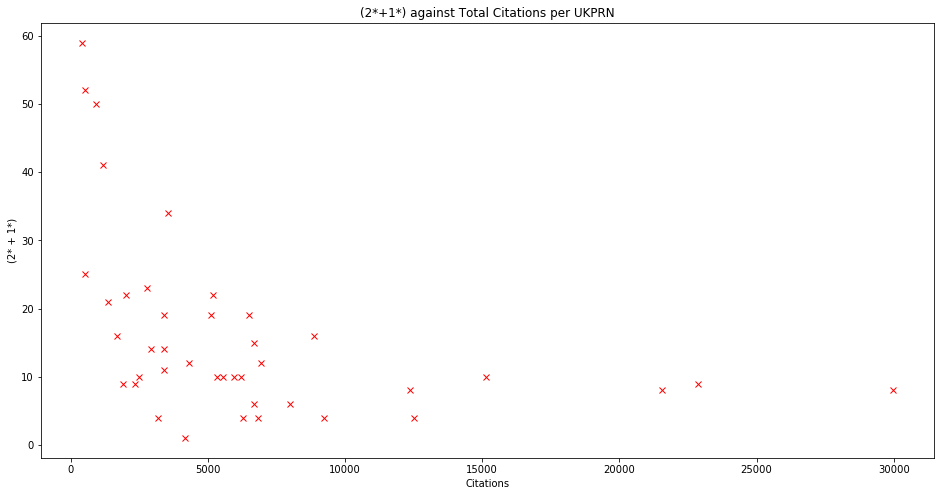

In [10]:
unilow_y = list(unilow.values())

fig, ax = plt.subplots(figsize=(16, 8))
#ax.set_yscale('log')
plt.plot(totcit_x, unilow_y, "rx")
plt.title("(2*+1*) against Total Citations per UKPRN")
ax.set(xlabel = "Citations", ylabel = "(2* + 1*)")


#plt.savefig("Cit 3*")

In [11]:
## Correlation of four star against total citations:
pearsonr(totcit_x, unilow_y)

(-0.42304799590536185, 0.0058554032795521275)

## Four Star against Total Income

In [13]:
# Load the submission profile file and clean it
resinc_or = pd.read_csv("REF2014Data_researchincome.csv")

# Drop irrelevant columns
resinc = resinc_or.drop(resinc_or.columns[[1,2,3]], axis=1)

resinc_col_list = list(resinc)

resinc_col_list.remove('UKPRN') 

resinc['TotalInc'] = resinc[resinc_col_list].sum(axis=1)

tot_inc = {}

for index, row in resinc.iterrows():
    item = row["UKPRN"]
    if item not in tot_inc:
        tot_inc[item] = row['TotalInc']/1000000
    else:
        tot_inc[item] += row['TotalInc']/1000000


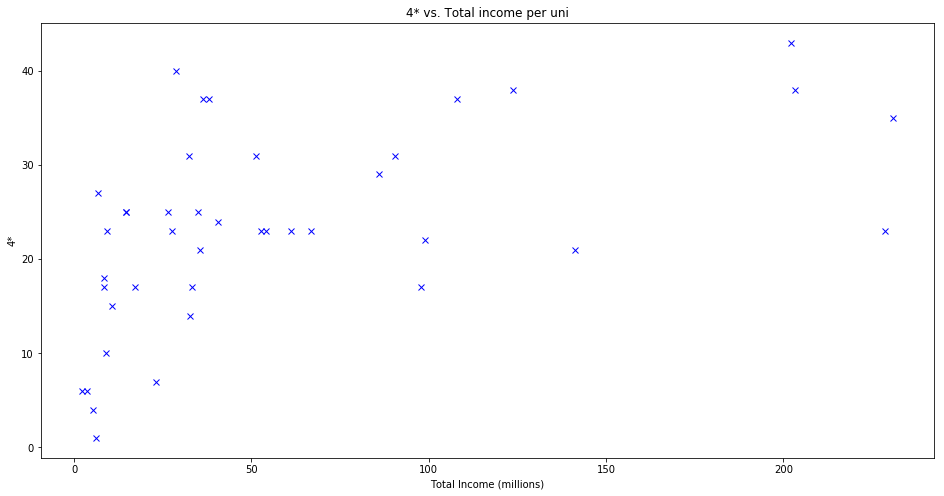

In [14]:
tot_inc_x = list(tot_inc.values())

fig, ax = plt.subplots(figsize=(16, 8))
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.plot(tot_inc_x, unifour_y, "bx")
plt.title("4* vs. Total income per uni")
ax.set(xlabel = "Total Income (millions)", ylabel = "4*")

#plt.savefig("Inc4*")

In [15]:
## Correlation of four star against total income:
pearsonr(tot_inc_x, unifour_y)

(0.52543406129184533, 0.00041938049461459089)

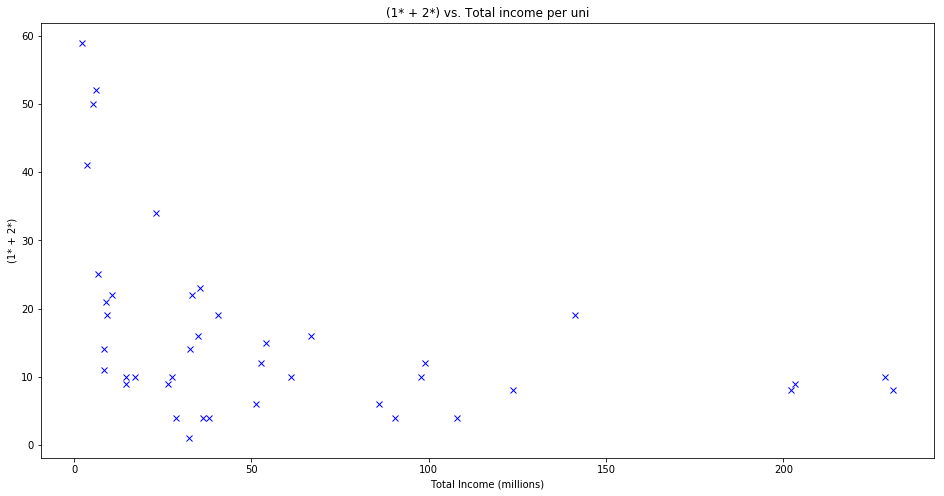

In [16]:
plt.figure("Inc3*")
fig, ax = plt.subplots(figsize=(16, 8))
#ax.set_yscale('log')
#ax.set_xscale('log')
plt.plot(tot_inc_x, unilow_y, "bx")
plt.title("(1* + 2*) vs. Total income per uni")
ax.set(xlabel = "Total Income (millions)", ylabel = "(1* + 2*)")

#plt.savefig("Inc3*")

In [17]:
## Correlation of four star against total income:
pearsonr(tot_inc_x, unilow_y)

(-0.38661845883182827, 0.012526581524826046)